##K nearest neighbour
 
- run the k nearest neighbour algorithm for a range of values of k
- output the prediction and compare with the true values on the validation set
- choose best k and run the k nearest neighbour on the test data using that value

In [ ]:
import numpy as np
import pandas as pd

def data_cleaner(data):
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

In [ ]:
import pandas as pd
import numpy as np

#load training data
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/train.csv"
npf_train_raw = pd.read_csv(url)
npf_train = data_cleaner(npf_train_raw)

#create feature array and target column for training data
X_train = npf_train.iloc[:,2:]
y_train = npf_train["class2"]

#import validation data
npf_validation_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/validation.csv")
npf_validation = data_cleaner(npf_validation_raw)

#create feature array and target column for test data
X_validation = npf_validation.iloc[:,2:]
y_validation = npf_validation["class2"]

#import test data
npf_test_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/test.csv")
npf_test = data_cleaner(npf_test_raw)

#create feature array and target column for test data
X_test = npf_test.iloc[:,2:]
y_test = npf_test["class2"]

rate of correct predictions for k = 1 0.7441860465116279
rate of correct predictions for k = 2 0.7441860465116279
rate of correct predictions for k = 3 0.7558139534883721
rate of correct predictions for k = 4 0.7209302325581395
rate of correct predictions for k = 5 0.7441860465116279
rate of correct predictions for k = 6 0.7325581395348837
rate of correct predictions for k = 7 0.7558139534883721
rate of correct predictions for k = 8 0.7790697674418605
rate of correct predictions for k = 9 0.7441860465116279
rate of correct predictions for k = 10 0.7558139534883721
rate of correct predictions for k = 11 0.7441860465116279
rate of correct predictions for k = 12 0.7325581395348837
rate of correct predictions for k = 13 0.7093023255813954
rate of correct predictions for k = 14 0.7325581395348837
rate of correct predictions for k = 15 0.7441860465116279
rate of correct predictions for k = 16 0.7558139534883721
rate of correct predictions for k = 17 0.7558139534883721
rate of correct predict

(1.0, 40.0)

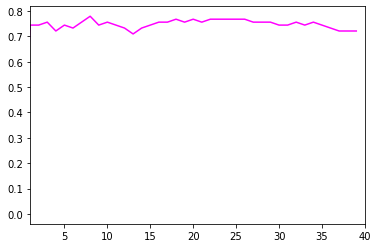

In [ ]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

#set up for storing error rate
pred_rate = np.zeros(40)

for k in range(1,40):
    #run algorithm
    knn = KNeighborsClassifier(n_neighbors=k) 
    #fit to training data
    knn.fit(X_train, y_train) 
    #predicted values for class2 on validation set
    y_predictions = knn.predict(X_validation)
    #compare predictions with actual results
    y_s = np.c_[y_validation,y_predictions]
    correct_ind = np.where(y_s[:,0] == y_s[:,1], 1,0)
    #find error on validation set
    pred_rate[k] = np.mean(correct_ind)
    print('rate of correct predictions for k = %i' %k,pred_rate[k])

f, ax = plt.subplots(1)
plt.plot(pred_rate,color="fuchsia")
ax.set_xlim(1, 40)

binary accuracy for 13-NN on test set= 0.8604651162790697


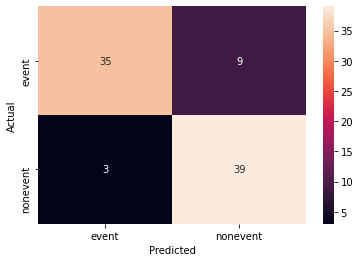

In [ ]:
import seaborn as sns
#use k with lowest validation error 
#k=13
knn = KNeighborsClassifier(n_neighbors=13) 
#fit to training data
knn.fit(X_train, y_train) 

y_predictions = knn.predict(X_test)

#accuracy rate
from sklearn import metrics
#accuracy metric for the test set 
print('binary accuracy for 13-NN on test set=', metrics.accuracy_score(y_test, y_predictions))

#map predictions on heat map
confusion_matrix = pd.crosstab(y_test, y_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#perplexity? 

Results
- Lowest validation error was given by k=13
- classifies well for non-event, less well for event days, predicts highly that they will be non-event. 


accuracy for 13-NN on test set= 0.6627906976744186


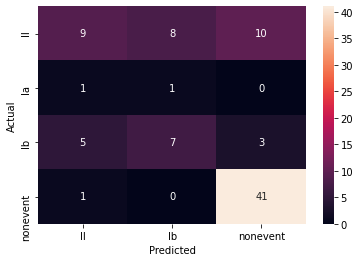

In [ ]:
#repeat optimal k finding for multiclassifier
#try multi classifiers with k nearest? 

y_train_multi = npf_train["class4"]

y_test_multi = npf_test["class4"]

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train_multi) 

#predicted values for class2
y_predictions_multi = knn.predict(X_test)

confusion_matrix = pd.crosstab(y_test_multi, y_predictions_multi, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


print('accuracy for 13-NN on test set=', metrics.accuracy_score(y_test_multi, y_predictions_multi))

In [ ]:
npf_test_hidden_raw = pd.read_csv("https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/data/npf_test_hidden.csv")
npf_test_hidden = data_cleaner(npf_test_hidden_raw)

#create feature array and target column for test data
X_test_hidden = npf_test_hidden.iloc[:,2:]
y_test_hidden = npf_test_hidden["class2"]

#run algorithm for k=13
knn = KNeighborsClassifier(n_neighbors=13) 
#using the training data as before
knn.fit(X_train, y_train) 
#predicted values for class2
y_predictions = knn.predict(X_test_hidden)

print(y_predictions)

['event' 'nonevent' 'nonevent' 'event' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'event' 'event' 'event'
 'event' 'event' 'nonevent' 'nonevent' 'event' 'event' 'event' 'event'
 'nonevent' 'nonevent' 'event' 'event' 'nonevent' 'event' 'nonevent'
 'event' 'event' 'nonevent' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent'
 'event' 'event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent'
 'nonevent' 'nonevent' 'event' 'nonevent' 'event' 'nonevent' 'nonevent'
 'event' 'event' 'nonevent' 'nonevent' 'event' 'event' 'event' 'event'
 'event' 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent'
 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent'
 'nonevent' 'event' 'event' 'event' 'event' 'event' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'nonevent' 'event' 'nonevent'
 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent'
 'nonev

Accuracy on test set:  0.9534883720930233


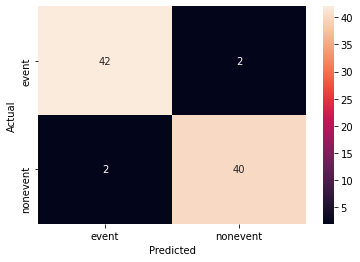

In [ ]:
#logistic regression
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#normalise the X data
from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)

#binary classifier with logistic regression
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_norm,y_train)
y_pred_lr = logistic_regression.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test, y_pred_lr, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy on test set: ',metrics.accuracy_score(y_test, y_pred_lr))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy:  0.6511627906976745


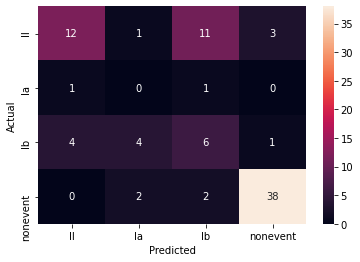

In [ ]:
#multivariate classifier with logistic regression

y_train_multi = npf_train["class4"]

y_test_multi = npf_test["class4"]

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_norm,y_train_multi)
y_pred_multi = logistic_regression.predict(X_test_norm)

confusion_matrix = pd.crosstab(y_test_multi, y_pred_multi, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test_multi, y_pred_multi))

#conclusion... not doing too good with this one. 